# dose - depth plot programs 

### define the functions

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
def MakeDoseList_z(filename,Z):

    data_origin = pd.read_csv(filename)
    
    data_dose = data_origin[data_origin['dose']>0].drop(columns = ["ix","iy","iz"])
    data_z = data_origin[data_origin['dose']>0].drop(columns = ["ix","iy","dose"])
    
    deps = np.zeros(Z)
    list_z = np.zeros(Z)
    
    for i in range(len(data_z)):
        deps[data_z.iloc[i]] += data_dose.iloc[i]
    for i in range(Z):
        list_z[i] = 0.2 * i

    return list_z,deps

In [121]:
def MakeDoseList_z_new(filename,Z):

    data_origin = pd.read_csv(filename)
    
    data = data_origin[data_origin['dose']>0].drop(columns = ["ix","iy"])
    
    for i in range(Z):
        d += data[data['iz'] == i]
        print(d)

    return 

In [19]:
def MakeDoseList_scorp(filename, Z, scorp_x, scorp_y):
    data_origin = pd.read_csv(filename)

    data_scorp_y = data_origin[data_origin['iy'] == scorp_y]
    data_scorp_xy = data_scorp_y[data_scorp_y['ix'] == scorp_x].drop(columns = ['ix','iy','iz'])
    
    list_z = np.zeros(Z)
    for i in range(Z):
        list_z[i] = 0.2 * i
    
    return list_z, data_scorp_xy

### Import csv data written by voxel order

In [114]:
z,deps_beam = MakeDoseList_z("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_beam.csv",150)

Empty DataFrame
Columns: [ix, iy, iz, dose]
Index: []


In [21]:
z,deps_gun = MakeDoseList_z("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_gun.csv",150)

In [22]:
z,deps_my_gun = MakeDoseList_z("/home/yoshijun/Work/tutorial01/TestBench/data/pencilbeam.csv",150)

In [23]:
z,deps_my_beam = MakeDoseList_z("/home/yoshijun/Work/tutorial01/TestBench/data/broadbeam.csv",150)

### Import csv data written by voxel order (x,y) = (30,30)

In [69]:
z,deps_my_beam_scorp = MakeDoseList_scorp('/home/yoshijun/Work/tutorial01/TestBench/data/broadbeam.csv',150,30,30)

In [70]:
z,deps_my_gun_scorp = MakeDoseList_scorp('/home/yoshijun/Work/tutorial01/TestBench/data/pencilbeam.csv',150,30,30)

In [71]:
z,deps_beam_scorp = MakeDoseList_scorp("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_beam.csv",150,30,30)

In [72]:
z,deps_gun_scorp = MakeDoseList_scorp("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_gun.csv",150,30,30)

### Plot depth -dose

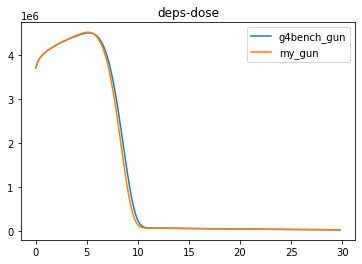

In [73]:
# plt.plot(z,deps_beam, label = "g4bench_beam")
plt.plot(z,deps_gun,  label = "g4bench_gun")
plt.plot(z,deps_my_gun, label= "my_gun")
# plt.plot(z,deps_my_beam, label = "my_beam")
plt.title("deps-dose")
# plt.xlim(5,12)
plt.legend()
plt.show()

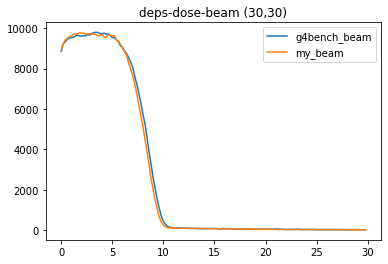

In [74]:
plt.plot(z,deps_beam_scorp, label = "g4bench_beam")
plt.plot(z,deps_my_beam_scorp, label = "my_beam")
plt.title("deps-dose-beam (30,30)")
plt.legend()
plt.show()

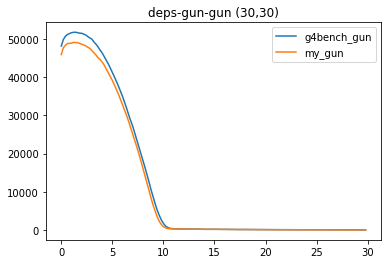

In [75]:
plt.plot(z,deps_gun_scorp,  label = "g4bench_gun")
plt.plot(z,deps_my_gun_scorp, label= "my_gun")
plt.title("deps-gun-gun (30,30)")
plt.legend()
plt.show()

## the result of gun beam shoot directly to water voxel

In [31]:
z, g4gun_direc = MakeDoseList_z("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_gun_direct.csv",150)

In [32]:
z,mygun_direc = MakeDoseList_z("/home/yoshijun/Work/tutorial01/TestBench/data/pencilbeam_direct.csv",150)

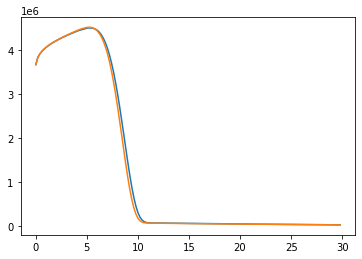

In [102]:
plt.plot(z, g4gun_direc)
plt.plot(z,mygun_direc)
# plt.plot(z,(g4gun_direc-mygun_direc)/mygun_direc)
# plt.xlim(0,0.25)
plt.show()

In [111]:
z, g4gun_direc_scorp = MakeDoseList_scorp("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_gun_direct.csv",150,30,30)

In [112]:
z,mygun_direc_scorp = MakeDoseList_scorp("/home/yoshijun/Work/tutorial01/TestBench/data/pencilbeam_direct.csv",150,30,30)

Text(0.5, 0, 'depth [cm]')

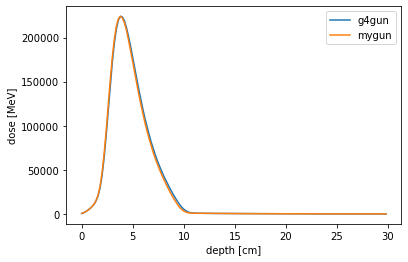

In [109]:
plt.plot(z,g4gun_direc_scorp,label = "g4gun")
plt.plot(z,mygun_direc_scorp,label = "mygun")
plt.legend()
plt.ylabel("dose [MeV]")
plt.xlabel("depth [cm]")

### beam directry shoot all water logical boxcell

In [38]:
z,mygun_direc_AW_scorp = MakeDoseList_scorp("/home/yoshijun/Work/tutorial01/TestBench/data/pencilbeam_direct_all_water.csv",150,30,30)

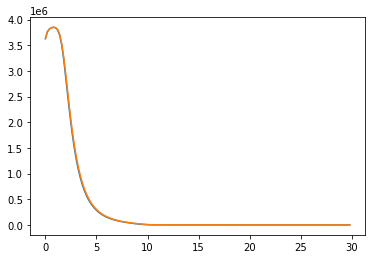

In [40]:
plt.plot(z,mygun_direc_AW_scorp)
plt.plot(z,g4gun_direc_scorp)

### beam shoot galaxcy

In [49]:
z,mygun_broad_galac = MakeDoseList_scorp("/home/yoshijun/Work/tutorial01/TestBench/data/broadbeam_galactic_all_water.csv",150,30,30)

In [52]:
z,mygun_pencil_galac = MakeDoseList_scorp("/home/yoshijun/Work/tutorial01/TestBench/data/pencilbeam_galaxy_all_water.csv",150,30,30)

In [57]:
z,g4gun_pencil_galac = MakeDoseList_scorp("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_gun_galactic.csv",150,30,30)

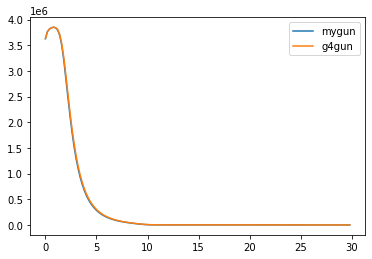

In [63]:
plt.plot(z,mygun_pencil_galac, label = "mygun")
plt.plot(z,g4gun_pencil_galac, label = "g4gun")
plt.legend()

### place voxell by parameterised

In [128]:
z,mygun_gun_nested = MakeDoseList_scorp("/home/yoshijun/Work/tutorial01/TestBench/data/pencilbeam_galaxy_nestedPara.csv",150,30,30)

In [129]:
z,mygun_broad_nested = MakeDoseList_scorp("/home/yoshijun/Work/tutorial01/TestBench/data/broadbeam_galactic_nestedPara.csv",150,30,30)

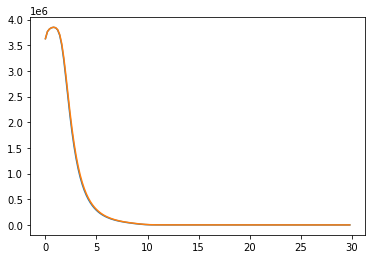

In [134]:
plt.plot(z,mygun_gun_nested)
plt.plot(z,g4gun_pencil_galac)

dose    0.108929
Name: 210236, dtype: float64


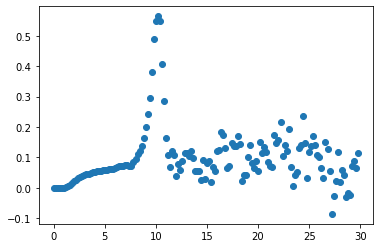

In [152]:
diff = (g4gun_pencil_galac - mygun_gun_nested) / mygun_gun_nested
print(diff.iloc[56])
plt.scatter(z,diff)

### dose all voxcel

In [161]:
mygun_all_dose = pd.read_csv("/home/yoshijun/Work/tutorial01/TestBench/data/pencilbeam_single_voxel.csv")

In [162]:
mybeam_all_dose = pd.read_csv("/home/yoshijun/Work/tutorial01/TestBench/data/broadbeam_single_voxel.csv")

In [166]:
print(mygun_all_dose['dose'] / 10000000) #mygun 
print(mybeam_all_dose['dose'] / 10000000) #mybeam
print(19.041) #g4bench

0    18.6092
Name: dose, dtype: float64
0    18.5995
Name: dose, dtype: float64
19.041
